In [2]:
# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd
from pandas import DataFrame
import numpy as np
pd.set_option('display.max_columns', None)  # Establece una opción de Pandas para mostrar todas las columnas de un DataFrame.

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("whitegrid")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')

ModuleNotFoundError: No module named 'sklearn'

In [3]:
df_data_original =pd.read_csv("DATA.CSV",index_col=0)
df_data_original.head(2).T

,0,1
Age,51,52
Attrition,No,No
BusinessTravel,NaN,NaN
DailyRate,"684,0$","699,0$"
Department,NaN,NaN
DistanceFromHome,6,1
Education,3,4
EducationField,NaN,Life Sciences
employeecount,1,1
employeenumber,"162,0","259,0"


In [5]:
df_data_original.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'employeecount',
       'employeenumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NUMCOMPANIESWORKED',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TOTALWORKINGYEARS', 'TrainingTimesLastYear', 'WORKLIFEBALANCE',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YEARSWITHCURRMANAGER', 'SameAsMonthlyIncome', 'DateBirth', 'Salary',
       'RoleDepartament', 'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

# 1.Homogeneización del nombre de las columnas (en minúsculas)

In [4]:
df_data_copy= df_data_original.copy()


In [5]:
df_data_copy.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1


In [8]:
nuevas_columnas={columna:columna.lower() for columna in df_data_copy} #modificamos las columnas a minúsculas
df_data_copy.rename(columns= nuevas_columnas, inplace= True) #cambiamos las columnas antiguas por las homogeneizadas en el paso anterior (nuevas_columnas)

In [6]:
df_data_copy.head(2).T

,0,1
Age,51,52
Attrition,No,No
BusinessTravel,NaN,NaN
DailyRate,"684,0$","699,0$"
Department,NaN,NaN
DistanceFromHome,6,1
Education,3,4
EducationField,NaN,Life Sciences
employeecount,1,1
employeenumber,"162,0","259,0"


# 2. Limpieza y verificación de datos
- 2.1 Modificar columnas categóricas a numéricas
- 2.2 Homogeneizar las etiquetas de las columnas categóricas
- 2.3 Distance from home - cambiar los valores negativos a positivos -- Nuestra decisión es que hubo un error de inserción pero q son valores positivos
- 2.4 Creación de nuevas columnas
- 2.5 Environmental satisfaction
- 2.6 Verificación de categorías
- 2.7 Duplicados
- 2.8 Nulos

#### 2.1 Cambiar de strings (objeto) a numéricas

In [9]:
#____STRING A INT_________
#age:               12 valores en letras: cambiarlos a nros + convertir todos los nros a int.
#worklifebalance quitar ",0" y convertir a int.

#____STRING A FLOAT_________
#totalworkingyears: cambiar comas por puntos
#daily rate (comas por puntos y quitarle el símbolo del dolar)
#hourly rate
#monthlyincome
#monthlyrate

In [7]:
#Age:
def texto_nro(cadena):
    cadena = cadena.replace("twenty-six","26").replace("twenty-four","24").replace("thirty-two","32").replace("thirty-six","36").replace("thirty-seven","37").replace("thirty-one","31").replace("thirty","30").replace("forty-seven","47").replace("fifty-two","52").replace("fifty-five","55").replace("fifty-eight","58")
    return int(cadena)

df_data_copy["age"] = df_data_copy["age"].apply(texto_nro)


KeyError: 'age'

In [11]:
#Worklifebalance:  ### AUNQUE LO DIGA QUE A UN INT. LO CONVIERTE A FLOAT

def nro(cadena):

    try: 
        cadena = cadena.replace(",0","")
        return int(cadena)
    
    except: 
        return np.nan #tiene varios valores que son "nan"

df_data_copy["worklifebalance"] = df_data_copy["worklifebalance"].apply(nro)

In [12]:
# totalworkingyears", "monthlyincome", "monthlyrate: Cambio de string a float

def decimal(cadena):

    try: 
        return float(cadena.replace(",",".").replace("$","."))

    except: 
        return np.nan #tiene varios valores que son "nan"
    
columnas_decimal = ["totalworkingyears", "monthlyincome"]

for columna in columnas_decimal:
    df_data_copy[columna] = df_data_copy[columna].apply(decimal)

In [13]:
# "hourlyrate", "monthlyrate" : cambio de string a float - no tienen decimales

def decimal3(cadena):
    try:
        return float(cadena)
    except:
        return np.nan

col_dec_ent = ["hourlyrate", "monthlyrate"]

for columna in col_dec_ent:
    df_data_copy[columna] = df_data_copy[columna].apply(decimal3)

In [14]:
## Nota: hourlyrate - parecía en el original como si no hubiese nulos pero había algunos que eran "Not available" y q contaban como interger

#### 2.2 Homogeneizar categóricas

In [8]:
#Columnas a homogeneizar sus categorías:
# educationfield (minúsculas)
# jobrole (minúsculas)
# maritalstatus(minúsculas y homogeneización)

def homogeneizar(cadena):
    try:
        return cadena.lower().replace("marreid","married")
    except:
        return np.nan

col_homo = ["educationfield", "jobrole", "maritalstatus"]

for columna in col_homo:
    df_data_copy[columna] = df_data_copy[columna].apply(homogeneizar)

KeyError: 'educationfield'

In [16]:
#df_data_copy[["educationfield", "jobrole", "maritalstatus"]]

In [17]:
#df_data_copy["educationfield"].value_counts()

In [15]:
# Homogeneizar "remotework" a 2 opciones: Yes, No
df_data_copy["remotework"] = df_data_copy["remotework"].replace({"True": "Yes", 'False': "No", '0': "No", '1': "Yes"})

#### 2.3 Distance from home - cambiar negativos a positivos

In [16]:
def cambiar_positivos(numero):
    try:
        return abs(numero) #"abs" es un método de pandas para cambiar de negativo a positivo
    except:
        return np.nan

df_data_copy["distancefromhome"] = df_data_copy["distancefromhome"].apply(cambiar_positivos)

In [20]:
#OPCIÓN 2_alternativa
# df_data_copy["distancefromhome"] = df_data_copy["distancefromhome"].apply(lambda x: int(str(x).replace("-", "")) if "-" in str(x) else int(x))
# df_data_copy

#### 2.4 Creación de nuevas columnas

In [17]:
#1. GÉNERO

#Creamos la función 
def categorizar_gender (numero):
    if numero == 0:
        return 'male'
    else:
        return 'female'

#Creación de una columna con la función
df_data_copy["gender_cat"] = df_data_copy["gender"].apply(categorizar_gender)

In [ ]:
#2. environmentsatisfaction

def categorizar_environmentsatisfaction(valor):

    if valor == 4:
        return "Máxima"
    elif valor == 3:
        return "Media"
    elif valor == 2:
        return "Poca"
    elif valor == 1:
        return "Nada"
    else:
        return "Unknown"

df_data_copy["environmentsatisfaction_cat"] = df_data_copy["environmentsatisfaction"].apply(categorizar_environmentsatisfaction)

df_data_copy.head(2)


#### 2.5 Environmentalsatisfaction (cambiar a nulos los que no son 1-4)

In [18]:

def convertir_nulos (numero):
    if numero == 1:
        return numero
    elif numero == 2: 
        return numero
    elif numero == 3:
        return numero
    elif numero == 4:
        return numero
    else:
        return np.nan

#Creación de una columna con la función
df_data_copy["environmentsatisfaction"] = df_data_copy["environmentsatisfaction"].apply(convertir_nulos)

In [65]:
#df_data_copy["environmentsatisfaction"].isnull().sum()

100

#### 2.6 Verificación de clasificaciones categóricas
- education (1 menos y 5 más educación)
    Parece que es así pero hay personas con un nivel "1" de educación que son directores y managers y tb 1 q tienenn altos "hourlyrates"

- jobinvolvement (1 menos y 4 máximo) -  a priori
    No puedo determinarlo, no parece q esté unico a jobsatisfaction

- jobsatisfaction (1 mínimo y 4 máximo) - a priori
    No puedo determinarlo, no parece q esté unico a jobsatisfaction

- joblevel (1 mínimo y 5 máximo) - a priori
    Sí, el 1 son técnicos el 5 son managers, directores

- relationshiptsatisfaction (1 mínimo y 4 máximo) - a priori
    No guarda una relación directa con otras columnas

- stockoption (0 sin opciones y 1-3 de pocas acciones a muchas) - a priori
No guarda una relación directa con otras columnas. Hay empleados q llevan 0 años trabjando y tienen el nivel 3 de opciones. y tampoco por el tipo de posición hay relación

- workinglifebalance (1 mínimo -4 máximo) -a prioru
tampoco existe relación directa con otras columnas

In [ ]:
#2. environmentsatisfaction,relationshipsatisfaction,worklifebalance

def categorizar_environmentsatisfaction(valor):

    if valor == 4:
        return "Máxima"
    elif valor == 3:
        return "Media"
    elif valor == 2:
        return "Poca"
    elif valor == 1:
        return "Nada"
    else:
        return "Unknown"

df_data_copy["environmentsatisfaction_cat"] = df_data_copy["environmentsatisfaction"].apply(categorizar_environmentsatisfaction)
df_data_copy["relationshipsatisfaction_cat"] = df_data_copy["relationshipsatisfaction"].apply(categorizar_environmentsatisfaction)
df_data_copy["worklifebalance_cat"] = df_data_copy["worklifebalance"].apply(categorizar_environmentsatisfaction)

df_data_copy.head(2)


In [ ]:
#education
def categorizar_education(valor):
    if valor == 5:
        return "grado superior"
    elif valor == 3:
        return "grado medio"
    elif valor == 2:
        return "bachiller"
    elif valor == 1:
        return "educacion basica"
    else:
        return "Unknown"

df_data_copy["education_cat"] = df_data_copy["education"].apply(categorizar_education)

df_data_copy.head(2)

In [ ]:
#"jobinvolvement"

def categorizar_jobinvolvement(valor):
    if valor == 5:
        return "muy implicado"
    elif valor == 3:
        return "implicado"
    elif valor == 2:
        return "poco implicado"
    elif valor == 1:
        return "nada implicado"
    else:
        return "Unknown"

df_data_copy["jobinvolvement_cat"] = df_data_copy["jobinvolvement"].apply(categorizar_jobinvolvement)

df_data_copy.head(2)

In [ ]:
#relationshipsatisfaction

In [24]:
#df_data_copy[["education","educationfield","age","joblevel","jobrole", "hourlyrate","monthlyrate","yearsatcompany"]].sort_values(by = "hourlyrate", ascending=False).head(50)

In [25]:
#df_data_copy[["jobinvolvement","environmentsatisfaction","jobsatisfaction"]].sort_values(by = "jobinvolvement", ascending=False).tail(50)

In [26]:
#df_data_copy[["joblevel","jobrole", "hourlyrate","monthlyrate","yearsatcompany","education","educationfield","age"]].sort_values(by = "joblevel", ascending=False).head(50)

In [27]:
#df_data_copy[["jobinvolvement","environmentsatisfaction","jobsatisfaction"]].sort_values(by = "jobsatisfaction", ascending=False).tail(50)

In [28]:
#df_data_copy[["jobinvolvement","environmentsatisfaction","jobsatisfaction", "relationshipsatisfaction"]].sort_values(by = "relationshipsatisfaction", ascending=False).head(50)

In [29]:
#df_data_copy[["stockoptionlevel", "yearsatcompany","totalworkingyears","joblevel","jobrole"]].sort_values(by = "stockoptionlevel", ascending=False).head(50)

In [30]:
#df_data_copy[["worklifebalance","jobinvolvement","environmentsatisfaction","jobsatisfaction", "relationshipsatisfaction"]].sort_values(by = "worklifebalance", ascending=False).head(50)

#### 2.7 Duplicados (filas)

In [34]:
df_data_copy.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework', 'gender_cat'],
      dtype='object')

In [20]:
#Nro. de duplicados de todas las finals
df_data_copy.duplicated().sum()

43

In [21]:
df_data_copy.duplicated(keep=False).sum()

86

In [23]:
#Nro. de duplicados en base al employeenumber
df_data_copy["employeenumber"].duplicated().sum()

534

In [28]:
#Visualización de todos los duplicados 
df_data_copy[df_data_copy.duplicated(keep=False)].sort_values(by = ["jobrole","age","dailyrate"], ascending=False).head(50).T

,349,1592,884,1525,319,1562,324,1567,463,1505,82,1474,366,1609,369,1612,1002,1489,894,1535,338,1581,457,1499,301,1544,83,1475,469,1511,899,1540,989,1485,889,1530,875,1516,359,1602,988,1484,87,1479,341,1584,321,1564,332,1575
age,45,45,21,21,56,56,48,48,43,43,38,38,36,36,36,36,35,35,34,34,32,32,31,31,29,29,29,29,28,28,45,45,38,38,36,36,28,28,26,26,26,26,38,38,32,32,46,46,37,37
attrition,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No
businesstravel,travel_rarely,travel_rarely,NaN,NaN,NaN,NaN,travel_rarely,travel_rarely,travel_frequently,travel_frequently,NaN,NaN,travel_rarely,travel_rarely,non-travel,non-travel,NaN,NaN,NaN,NaN,NaN,NaN,travel_rarely,travel_rarely,travel_frequently,travel_frequently,travel_frequently,travel_frequently,travel_frequently,travel_frequently,NaN,NaN,travel_frequently,travel_frequently,travel_rarely,travel_rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,travel_rarely,travel_rarely,NaN,NaN,travel_rarely,travel_rarely
dailyrate,"954,0$","954,0$","895,0$","895,0$","906,0$","906,0$","163,0$","163,0$","1422,0$","1422,0$","119,0$","119,0$","530,0$","530,0$","1229,0$","1229,0$","1182,0$","1182,0$","1381,0$","1381,0$","929,0$","929,0$","196,0$","196,0$","442,0$","442,0$","1413,0$","1413,0$",nan$,nan$,"192,0$","192,0$","1186,0$","1186,0$","329,0$","329,0$","1157,0$","1157,0$",nan$,nan$,"342,0$","342,0$",nan$,nan$,"1018,0$","1018,0$","1485,0$","1485,0$","482,0$","482,0$"
department,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distancefromhome,2,2,9,9,6,6,2,2,2,2,3,3,3,3,8,8,11,11,4,4,10,10,29,29,2,2,1,1,1,1,10,10,3,3,2,2,2,2,5,5,2,2,15,15,3,3,18,18,3,3
education,2,2,2,2,3,3,5,5,4,4,3,3,1,1,4,4,2,2,4,4,3,3,4,4,2,2,1,1,2,2,2,2,4,4,3,3,4,4,2,2,3,3,2,2,2,2,3,3,3,3
educationfield,NaN,NaN,NaN,NaN,life sciences,life sciences,NaN,NaN,life sciences,life sciences,life sciences,life sciences,life sciences,life sciences,technical degree,technical degree,marketing,marketing,NaN,NaN,marketing,marketing,marketing,marketing,NaN,NaN,NaN,NaN,life sciences,life sciences,life sciences,life sciences,NaN,NaN,NaN,NaN,medical,medical,medical,medical,life sciences,life sciences,life sciences,life sciences,life sciences,life sciences,medical,medical,other,other
employeecount,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
employeenumber,"783,0","783,0",NaN,NaN,NaN,NaN,"595,0","595,0","1849,0","1849,0","307,0","307,0","967,0","967,0","990,0","990,0",NaN,NaN,"523,0","523,0","722,0","722,0",NaN,NaN,"388,0","388,0",NaN,NaN,"1927,0","1927,0","544,0","544,0",NaN,NaN,"501,0","501,0","440,0","440,0",NaN,NaN,"1053,0","1053,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
print("Cantidad de filas antes de eliminar duplicados:", len(df_data_copy))
df_data_copy = df_data_copy.drop_duplicates(subset='employeenumber', keep='first')
print("Cantidad de filas después de eliminar duplicados:", len(df_data_copy))


Cantidad de filas antes de eliminar duplicados: 1614
Cantidad de filas después de eliminar duplicados: 1080


In [42]:
print("Cantidad de duplicados después de eliminar:", df_data_copy["employeenumber"].duplicated().sum())


Cantidad de duplicados después de eliminar: 0


#### 2.8 Nulos

In [31]:
#1.CATEGÓRICAS - Ana
# businesstravel
# department - muchos nulos
# education field
# marital status - 119
# overtime
# performancerating - 195 nulos
# Role in department - muchos nulos

In [32]:
#2.NUMÉRICAS - Elena
# hourly_rate = 84 nulos
# Environmental satisfaction 
# monthlyincome
# worklifebalance - 108
# totalworkingyears
# numberofchildren

In [33]:
#Columnas numéricas con nulos 
nulos_num = df_data_copy[df_data_copy.columns[df_data_copy.isnull().any()]].select_dtypes(include = np.number).columns
print(nulos_num)

Index(['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
       'totalworkingyears', 'worklifebalance', 'numberchildren'],
      dtype='object')


In [34]:
#% de nulos en las columnas numéricas con nulos
nl = (df_data_copy[nulos_num].isnull().sum() / df_data_copy.shape[0]) * 100
#nl.sort_values(ascending=False).reset_index()
nl.reset_index()

,index,0
0,environmentsatisfaction,6.195787
1,hourlyrate,5.204461
2,monthlyincome,52.230483
3,totalworkingyears,32.589839
4,worklifebalance,6.691450
5,numberchildren,100.000000


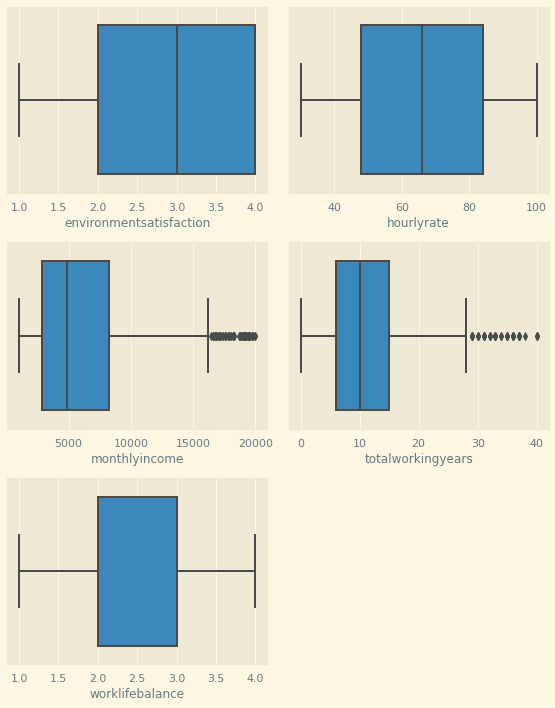

In [35]:
#Valores atípicos
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (8,10)) 
axes = axes.flat

for indice, col in enumerate(nulos_num):
    sns.boxplot(x = col, data = df_data_copy, ax = axes[indice])
    plt.xlabel(col)  

plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

In [40]:
#Para crear las columnas de iterativo y de knn automáticamente

#---------------ITERATIVE-----------------------------------
# palabras = ['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
#        'totalworkingyears', 'worklifebalance', 'numberchildren']

# palabras_iterativas = [palabra + '_iterativo' for palabra in palabras]

# print(palabras_iterativas)

# #---------------KNN-----------------------------------

# palabras2 = ['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
#        'totalworkingyears', 'worklifebalance', 'numberchildren']

# palabras_iterativas = [palabra + '_knn' for palabra in palabras2]

# print(palabras_iterativas)

# #---------------TODAS JUNTAS-----------------------------------

# pal = ['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
#        'totalworkingyears', 'worklifebalance', 'numberchildren']

# pal2 = ['environmentsatisfaction_iterativo', 'hourlyrate_iterativo', 'monthlyincome_iterativo', 'totalworkingyears_iterativo', 'worklifebalance_iterativo', 'numberchildren_iterativo']


# pal3 = ['environmentsatisfaction_knn', 'hourlyrate_knn', 'monthlyincome_knn', 'totalworkingyears_knn', 'worklifebalance_knn', 'numberchildren_knn']


# lista_concatenada = [item for sublist in zip(pal, pal2, pal3) for item in sublist]

# print(lista_concatenada)

#### Decisiones: Nulos (numéricas)
- Number of children: borrarla
- Todas las demás: +5% nulos a 52% utilizar el iterate y knn imputer - atípicos en monthlyincome y totalworkingyears

In [41]:
#ITERATIVE IMPUTER

imputer_iterative = IterativeImputer(max_iter =20, random_state=42)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_data_copy[['environmentsatisfaction', 'hourlyrate', 'monthlyincome','totalworkingyears', 'worklifebalance']])
imputer_iterative_imputado

array([[1.00000000e+00, 5.10000000e+01, 1.95370000e+04, 3.24307470e+01,
        3.00000000e+00],
       [3.00000000e+00, 6.50000000e+01, 1.99990000e+04, 3.40000000e+01,
        3.00000000e+00],
       [3.00000000e+00, 5.80000000e+01, 1.92320000e+04, 2.20000000e+01,
        3.23744284e+00],
       ...,
       [2.78915044e+00, 4.10000000e+01, 5.07897633e+03, 9.00000000e+00,
        3.00000000e+00],
       [1.00000000e+00, 8.40000000e+01, 6.89192341e+03, 1.20000000e+01,
        3.00000000e+00],
       [4.00000000e+00, 7.50000000e+01, 1.08450000e+04, 1.84477000e+01,
        3.00000000e+00]])

In [46]:
df_data_copy[['environmentsatisfaction_iterativo', 'hourlyrate_iterativo', 'monthlyincome_iterativo', 'totalworkingyears_iterativo', 'worklifebalance_iterativo']] = imputer_iterative_imputado

In [42]:
#KNN IMPUTER
imputer_knn = KNNImputer(n_neighbors=5)
imputer_knn_imputado = imputer_knn.fit_transform(df_data_copy[['environmentsatisfaction', 'hourlyrate', 'monthlyincome',
       'totalworkingyears', 'worklifebalance']])
imputer_knn_imputado

array([[1.0000e+00, 5.1000e+01, 1.9537e+04, 8.6000e+00, 3.0000e+00],
       [3.0000e+00, 6.5000e+01, 1.9999e+04, 3.4000e+01, 3.0000e+00],
       [3.0000e+00, 5.8000e+01, 1.9232e+04, 2.2000e+01, 3.0000e+00],
       ...,
       [3.2000e+00, 4.1000e+01, 8.7630e+03, 9.0000e+00, 3.0000e+00],
       [1.0000e+00, 8.4000e+01, 6.4978e+03, 1.2000e+01, 3.0000e+00],
       [4.0000e+00, 7.5000e+01, 1.0845e+04, 1.0200e+01, 3.0000e+00]])

In [44]:
df_data_copy[['environmentsatisfaction_knn', 'hourlyrate_knn', 'monthlyincome_knn', 'totalworkingyears_knn', 'worklifebalance_knn']] = imputer_knn_imputado

In [47]:
#Comparamos las estadísticas generadas de por el iterative y el knn para decidir cuál coger (aquel cuya media y mediana sea más parecida a la original- En la columna con valores atípicos cogemos aquel cuya mediana sea más parecida a la original)
df_data_copy.describe()[['environmentsatisfaction', 'environmentsatisfaction_iterativo', 'environmentsatisfaction_knn', 'hourlyrate', 'hourlyrate_iterativo', 'hourlyrate_knn', 'monthlyincome', 'monthlyincome_iterativo', 'monthlyincome_knn', 'totalworkingyears', 'totalworkingyears_iterativo', 'totalworkingyears_knn', 'worklifebalance', 'worklifebalance_iterativo', 'worklifebalance_knn']].T

,count,mean,std,min,25%,50%,75%,max
environmentsatisfaction,1514.0,2.714003,1.098326,1.000000,2.000000,3.00000,4.00000,4.000000
environmentsatisfaction_iterativo,1614.0,2.714154,1.063828,1.000000,2.000000,3.00000,4.00000,4.000000
environmentsatisfaction_knn,1614.0,2.728005,1.074299,1.000000,2.000000,3.00000,4.00000,4.000000
hourlyrate,1530.0,66.028105,20.185954,30.000000,48.000000,66.00000,84.00000,100.000000
hourlyrate_iterativo,1614.0,66.029440,19.655071,30.000000,49.000000,66.00000,83.00000,100.000000
hourlyrate_knn,1614.0,65.953656,19.754645,30.000000,49.000000,66.00000,83.00000,100.000000
monthlyincome,771.0,6477.686122,4766.119959,1009.000000,2880.000000,4859.00000,8230.50000,19999.000000
monthlyincome_iterativo,1614.0,6399.055824,4016.132253,-353.616814,3600.676441,5734.58316,7038.68123,20660.354215
monthlyincome_knn,1614.0,6729.332094,3691.605870,1009.000000,4197.250000,6045.70000,8492.80000,19999.000000
totalworkingyears,1088.0,11.318934,7.727675,0.000000,6.000000,10.00000,15.00000,40.000000


### Cuál coger?
- env.satif_iterativo
- hourlyrate_iterativo
- Monthlyincome?? knn es quizás mejor!mejor representativo la moda q la media pq tiene muchos valores 
- totalworkingyears_iterativo
- worklifebalance_iterativo

In [48]:
##Pasos q faltan: 1.eliminar las columnas que no queremos y 2.cambiar el nombre de las columnas de knn e iterativo elegidas quitándoles las palabras "knn/iterativo"

## Nuestras decisiones
Distance from home - cambiar los valores negativos a positivos -- Nuestra decisión es que hubo un error de inserción pero q son valores positivos

## Martes 5.12
- Añadir funcions de todas y runearlas
- Ver duplicados y borrarlos
- Discutir nulos y decidir acción
- Borrar columnas

notas:
- El employee number no nos sirve - muchos nulos y muchos duplicados (534)
- 